# Operations and Supply Chain Analytics - Assignment 3

**Due:** April 16th

**Student:** Rodolfo Lerma

## Forecasting Demand for Supply Chain Management Overview

Forecasting is crucial for managing supply chain operations effectively. This notebook tackles two distinct forecasting problems using static methods, simple exponential smoothing, and Holt's model, providing a predictive insight into future demand based on historical data.

#### Problem 1: Static Forecasting Method for ABC Corporation

We forecast the monthly demand for Year 6 utilizing a static method, which takes into account historical sales data to predict future demand, factoring in seasonal variations, trends, and levels inherent in the historical data.

#### Problem 2: Exponential Smoothing Techniques for Flower Wholesaler

The quarterly demand for flowers is forecasted for Year 5 using simple exponential smoothing and Holt's linear trend method. These methods help in smoothing out fluctuations in demand to predict future sales more accurately.

### Data Description

- **ABC Corporation Monthly Sales Data**: Sales data from Year 1 to Year 5, categorized by month, to forecast demand for Year 6.
- **Quarterly Demand for Flowers**: Historical quarterly sales data for four years, used to forecast demand for Year 5 using smoothing techniques.

### Mathematical Formulations

#### Static Forecasting Method
The static forecasting method uses the following formula to adjust for seasonal variations:
$$ F_{t+m} = (T_t + mS_t) \times C_{t-L+(m \mod L)} $$
Where:

- $F_{t+m}$ is the forecast for period $t+m$.

- $T_t$ is the trend component at time $t$.

- $S_t$ is the seasonal index at time $t$.

- $C_{t-L+(m \mod L)}$ is the seasonal factor for the forecast period.

- $L$ is the length of the seasonal cycle.

- $m$ is the number of periods ahead for which the forecast is being made.

#### Simple Exponential Smoothing
For data without trend or seasonal components, simple exponential smoothing is applied as follows:

$$ \hat{y}_{t+1} = \alpha y_t + (1 - \alpha) \hat{y}_t $$

Where:

- $\hat{y}_{t+1}$ is the forecast for the next period.

- $y_t$ is the actual demand in the current period.

- $\hat{y}_t$ is the forecasted demand for the current period.

- $\alpha$ is the smoothing constant (0 < $\alpha$ < 1).

#### Holt's Linear Trend Method
Holt's model extends simple exponential smoothing for data with trends, using two equations:

1. Level equation:

$$ \ell_t = \alpha y_t + (1 - \alpha)(\ell_{t-1} + b_{t-1}) $$

2. Trend equation: 

$$ b_t = \beta^*(\ell_t - \ell_{t-1}) + (1 - \beta^*)b_{t-1} $$

Where:

- $\ell_t$ is the estimated level at time $t$.

- $b_t$ is the estimated trend at time $t$.

- $\beta^*$ is the smoothing constant for the trend.


### Objectives

1. **For ABC Corporation**: Utilize static forecasting to predict Year 6 monthly demand.
2. **For the Flower Wholesaler**: Implement simple exponential smoothing and Holt's model to forecast Year 5 quarterly demand, comparing the methodologies to determine the most effective approach.

The subsequent sections detail the analytical process, implementation of forecasting models, and a comparative analysis of the outcomes.

## Python Code Solution

### Problem 1: Static Method Forecasting
Consider monthly demand for the ABC Corporation, as shown in Table A3.1. Forecast the monthly demand for Year 6 using the static method for forecasting

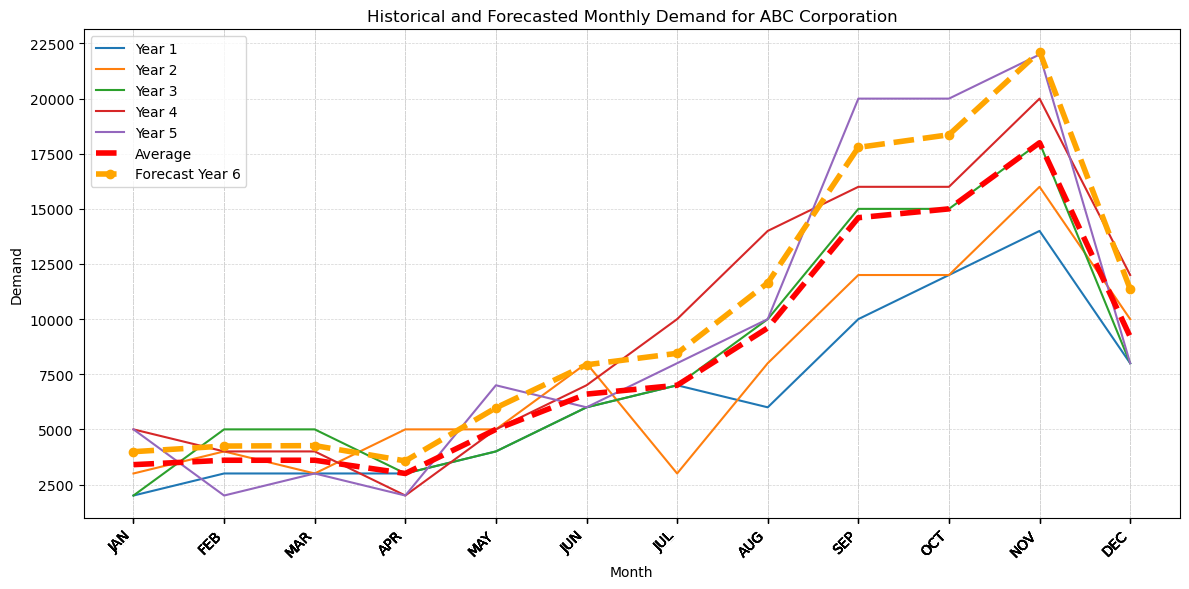

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Historical monthly sales data for Years 1 through 5
sales_data = {
    "JAN": [2000, 3000, 2000, 5000, 5000],
    "FEB": [3000, 4000, 5000, 4000, 2000],
    "MAR": [3000, 3000, 5000, 4000, 3000],
    "APR": [3000, 5000, 3000, 2000, 2000],
    "MAY": [4000, 5000, 4000, 5000, 7000],
    "JUN": [6000, 8000, 6000, 7000, 6000],
    "JUL": [7000, 3000, 7000, 10000, 8000],
    "AUG": [6000, 8000, 10000, 14000, 10000],
    "SEP": [10000, 12000, 15000, 16000, 20000],
    "OCT": [12000, 12000, 15000, 16000, 20000],
    "NOV": [14000, 16000, 18000, 20000, 22000],
    "DEC": [8000, 10000, 8000, 12000, 8000]
}

# Create DataFrame from the sales data
df_sales = pd.DataFrame(sales_data)

# Define the periodicity of the data (number of periods in one cycle)
periodicity = 12 # Monthly data, so 12 months in a year

# Calculate average monthly sales for each month over the 5 years
monthly_average = df_sales.mean(axis=0)
overall_average = monthly_average.mean()

# Calculate seasonal factors
seasonal_factors = monthly_average / overall_average

# Deseasonalize the data by dividing by the seasonal factors
deseasonalized_sales = df_sales / seasonal_factors

# Prepare data for linear regression
X = np.arange(1, periodicity * 5 + 1).reshape(-1, 1) # Months as a linear feature, respecting the periodicity
y = deseasonalized_sales.values.flatten()

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Estimate level (L) and trend (T)
L = model.intercept_
T = model.coef_[0]

# Forecast demand for Year 6
forecast_year_6 = (L + T * np.arange(periodicity * 5 + 1, periodicity * 6 + 1)).reshape(1, -1) * seasonal_factors.values

# Prepare for plotting
all_months = list(sales_data.keys()) * 6 # Months including forecast
years = ['Year ' + str(y) for y in range(1, 6)] + ['Forecast Year 6']
color_map = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'] # Different colors for each year

# Plot using Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))

# Plot historical data for each year
for i, color in zip(range(5), color_map[:-1]):
    ax.plot(all_months[:12], df_sales.iloc[i], linestyle='-', label=f'Year {i+1}', color=color)

# Plot average historical data
ax.plot(all_months[:12], monthly_average, linestyle='--', label='Average', color='red', linewidth=4)

# Plot forecasted data for Year 6
ax.plot(all_months[60:], forecast_year_6.flatten(), linestyle='--', marker='o', label='Forecast Year 6', color='orange', linewidth=4)

# Set plot title and labels
ax.set_title('Historical and Forecasted Monthly Demand for ABC Corporation')
ax.set_xlabel('Month')
ax.set_ylabel('Demand')

# Set x-axis tick labels
ax.set_xticks(all_months[:72])
ax.set_xticklabels(all_months[:72], rotation=45, ha='right')

# Add legend
ax.legend()

# Add light gray dashed grid
ax.grid(color='lightgray', linestyle='--', linewidth=0.5)

# Adjust layout to prevent overlapping of labels
plt.tight_layout()

# Show the plot
plt.show()

In [2]:
# Flatten the nested list to ensure it is a single list of integers
forecast_year_6 = forecast_year_6.tolist()

forecast_year_6 = forecast_year_6[0]

months = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]

# Print the forecast in a formatted table
print("Forecasted Monthly Demand for Year 6:")
print("-" * 42)
print("| Month | Demand (rounded) |")
print("-" * 42)
for month, forecast in zip(months, forecast_year_6):
    # Round the forecast to the nearest integer before formatting
    rounded_forecast = round(forecast)
    print(f"| {month:5s} | {rounded_forecast:7d} |")  # Use 'd' to format rounded integers
print("-" * 42)


Forecasted Monthly Demand for Year 6:
------------------------------------------
| Month | Demand (rounded) |
------------------------------------------
| JAN   |    3988 |
| FEB   |    4243 |
| MAR   |    4264 |
| APR   |    3570 |
| MAY   |    5979 |
| JUN   |    7929 |
| JUL   |    8449 |
| AUG   |   11642 |
| SEP   |   17789 |
| OCT   |   18361 |
| NOV   |   22135 |
| DEC   |   11366 |
------------------------------------------


### Forecast for Year 6

Here are the forecasted demands for ABC Corporation for each month in Year 6, calculated using the static method for forecasting

| Month | Forecasted Demand |
|-------|-------------------|
| JAN   | 3988              |
| FEB   | 4243              |
| MAR   | 4264              |
| APR   | 3570              |
| MAY   | 5979              |
| JUN   | 7929              |
| JUL   | 8449              |
| AUG   | 11642             |
| SEP   | 17789             |
| OCT   | 18361             |
| NOV   | 22135             |
| DEC   | 11366             |

These values are based on historical sales data from the previous five years and account for seasonal variations in demand.


### Problem 2: Simple Exponential Smoothing and Holt’s Model
Quarterly demand for flowers at a wholesaler are as shown in Table A3.2. Forecast quarterly demand for year 5 using simple exponential smoothing with α=0.1 as well as Holt’s model with α=0.1 and β=0.1. Which of the two methods do you prefer? Why?

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Given quarterly demand data
data = {
    "Year": np.repeat(np.arange(1, 5), 4),
    "Quarter": ["I", "II", "III", "IV"] * 4,
    "Demand": [98, 106, 109, 133, 130, 116, 133, 116, 138, 130, 147, 141, 144, 142, 165, 173]
}
df = pd.DataFrame(data)

# Prepare demand data
demands = df['Demand'].values

# Parameters for Simple Exponential Smoothing
alpha = 0.1
simple_exponential_forecast = [demands[0]]  # Initial forecast same as first demand

for t in range(1, len(demands)):
    F_next = alpha * demands[t-1] + (1 - alpha) * simple_exponential_forecast[-1]
    simple_exponential_forecast.append(F_next)

# Initial estimates for Holt's model
model = LinearRegression()
X = np.arange(len(demands)).reshape(-1, 1)
model.fit(X, demands)
b, a = model.intercept_, model.coef_[0]

# Holt's model parameters
beta = 0.1
L = b  # Initial level
T = a  # Initial trend
holt_forecast = [L + T]  # Start forecast with initial level plus trend

for t in range(1, len(demands)):
    L_new = alpha * demands[t] + (1 - alpha) * (L + T)
    T_new = beta * (L_new - L) + (1 - beta) * T
    L, T = L_new, T_new
    holt_forecast.append(L + T)

# Create forecast for Year 5
# Assuming there are 16 quarters in the provided data, forecast the next four quarters
for t in range(16, 20):
    next_forecast_ses = alpha * demands[-1] + (1 - alpha) * simple_exponential_forecast[-1]
    simple_exponential_forecast.append(next_forecast_ses)
    
    next_forecast_holt = L + T * (t - 15)
    holt_forecast.append(next_forecast_holt)

# Show forecast results
forecast_df = pd.DataFrame({
    "Quarter": ["Year 5 Q1", "Year 5 Q2", "Year 5 Q3", "Year 5 Q4"],
    "SES Forecast": simple_exponential_forecast[-4:],
    "Holt's Forecast": holt_forecast[-4:]
})

display(forecast_df)

,Quarter,SES Forecast,Holt's Forecast
0,Year 5 Q1,132.989581,165.114155
1,Year 5 Q2,136.990622,168.935177
2,Year 5 Q3,140.591560,172.756199
3,Year 5 Q4,143.832404,176.577221


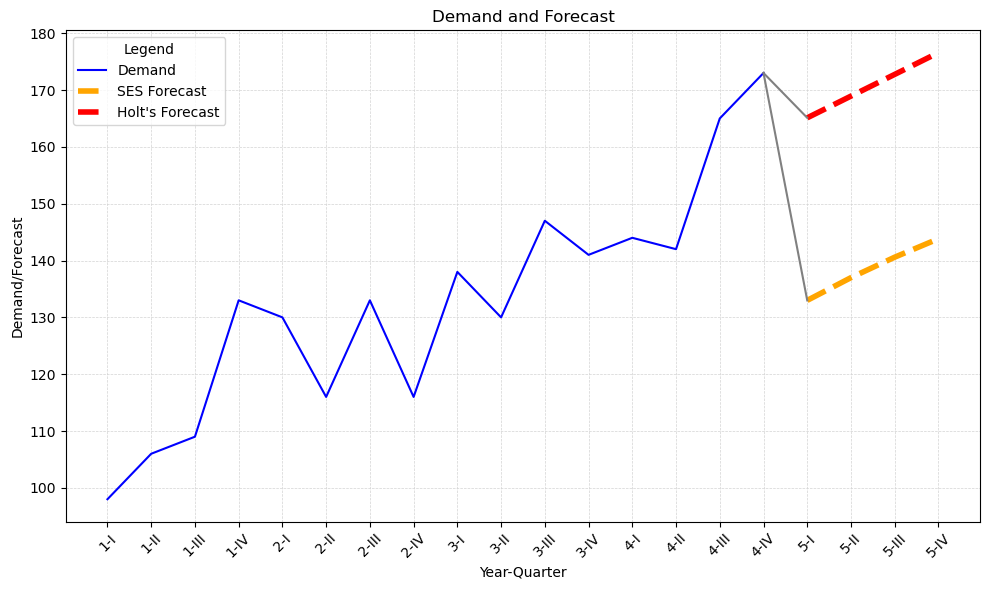

In [14]:
import matplotlib.pyplot as plt

# Create a dataframe for plotting
plot_df = pd.DataFrame({
    "Quarter": df["Quarter"].tolist() + ["I", "II", "III", "IV"],
    "Year": df["Year"].astype(str).tolist() + ["5", "5", "5", "5"],
    "Demand": demands.tolist() + [None] * 4,
    "SES Forecast": [None] * 16 + simple_exponential_forecast[-4:],
    "Holt's Forecast": [None] * 16 + holt_forecast[-4:]
})

# Combine Year and Quarter for the x-axis
plot_df["Year-Quarter"] = plot_df["Year"] + "-" + plot_df["Quarter"]

# Create the plot using Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Plot demand
ax.plot(plot_df["Year-Quarter"][:16], plot_df["Demand"][:16], color="blue", linestyle="-", label="Demand")

# Plot SES forecast
ax.plot(plot_df["Year-Quarter"][-4:], plot_df["SES Forecast"][-4:], color="orange", linestyle="--",  linewidth=4, label="SES Forecast")

# Plot Holt's forecast
ax.plot(plot_df["Year-Quarter"][-4:], plot_df["Holt's Forecast"][-4:], color="red", linestyle="--",  linewidth=4,label="Holt's Forecast")

# Plot gray connection lines
ax.plot([plot_df["Year-Quarter"][15], plot_df["Year-Quarter"][16]], [plot_df["Demand"][15], plot_df["SES Forecast"][16]], color="gray", linestyle="-")
ax.plot([plot_df["Year-Quarter"][15], plot_df["Year-Quarter"][16]], [plot_df["Demand"][15], plot_df["Holt's Forecast"][16]], color="gray", linestyle="-")

# Set plot title and labels
ax.set_title("Demand and Forecast")
ax.set_xlabel("Year-Quarter")
ax.set_ylabel("Demand/Forecast")

# Set legend
ax.legend(title="Legend")

# Add light gray dashed grid
ax.grid(color='lightgray', linestyle='--', linewidth=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent overlapping of labels
plt.tight_layout()

# Show the plot
plt.show()

### Forecasting Quarterly Demand for Flowers

This section uses historical data to forecast the quarterly demand for flowers at a wholesaler in Year 5 using Simple Exponential Smoothing and Holt's Linear Trend Method. The analysis compares these methods to identify the most suitable approach based on the forecast accuracy and adaptability to the demand trend.

#### Historical Quarterly Demand for Flowers

| Year | Quarter | Demand ($000) |
|------|---------|---------------|
| 1    | I       | 98            |
| 1    | II      | 106           |
| 1    | III     | 109           |
| 1    | IV      | 133           |
| 2    | I       | 130           |
| 2    | II      | 116           |
| 2    | III     | 133           |
| 2    | IV      | 116           |
| 3    | I       | 138           |
| 3    | II      | 130           |
| 3    | III     | 147           |
| 3    | IV      | 141           |
| 4    | I       | 144           |
| 4    | II      | 142           |
| 4    | III     | 165           |
| 4    | IV      | 173           |

#### Forecasting Results for Year 5

The forecasts for Year 5 using the Simple Exponential Smoothing and Holt's Linear Trend Method are as follows:

| Quarter     | SES Forecast | Holt's Forecast |
|-------------|--------------|-----------------|
| Year 5 Q1   | 132.99       | 165.11          |
| Year 5 Q2   | 136.99       | 168.94          |
| Year 5 Q3   | 140.59       | 172.76          |
| Year 5 Q4   | 143.83       | 176.58          |

#### Comparative Analysis and Method Preference

- **Adaptability to Trends:**
  - Holt's Linear Trend Method adapts to the underlying trend in the historical data, making it suitable for data that shows significant changes or trends over time.
  - Simple Exponential Smoothing maintains a level forecast, ideal for stable demand without significant fluctuations.

- **Forecast Accuracy:**
  - Holt’s forecasts account for both level and trend, providing a dynamic prediction that closely aligns with the incremental increases observed in the historical data.
  - Simple Exponential Smoothing forecasts tend to lag behind in scenarios where rapid changes occur, as it primarily focuses on smoothing out past data variations.

#### Conclusion

Given the observed trend in the demand data, **Holt's Linear Trend Method** is preferred for the following reasons:

1. **Better Trend Adaptation**: It effectively incorporates both recent demand levels and the direction in which the demand is moving, essential for accurate future forecasting.
2. **Practical Application**: For a wholesaler, forecasting that accounts for trends can lead to improved inventory management and fulfillment strategies, especially important in industries like floristry where demand can be highly variable and seasonally influenced.

This method, therefore, offers a strategic advantage by enabling proactive adjustments to purchasing and stock management in anticipation of future demand changes.